In [1]:
import pandas as pd

In [2]:
train = pd.read_csv(r"train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
def FillMissingValues(train):
    for column in train.columns:
        if train[column].isnull().sum() > 0:
            if train[column].dtype == 'object':
                train[column].fillna(train[column].mode()[0], inplace = True)
            elif train[column].dtype == 'str':
                train[column].fillna("Unknown", inplace = True)
            else:
                train[column].fillna(train[column].median(), inplace = True)
    return train
FillMissingValues(train)

# check for outliers first

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
# number of people surviving
Num_of_Alive_people = train['Survived'][train['Survived'] == 1].count()

In [11]:
Num_of_Alive_people

342

In [12]:
import numpy as np
# number of prople dead and alive
Num_of_Dead_and_Alive_People = train.groupby(train['Survived'])['Survived'].count()
Num_of_Dead_and_Alive_People

Survived
0    549
1    342
Name: Survived, dtype: int64

In [13]:
# Assuming Num_of_Dead_and_Alive_People is your Series
Num_of_Dead_and_Alive_People.rename(index={0: "Dead", 1: "Survived"}, inplace=True)
Num_of_Dead_and_Alive_People

Survived
Dead        549
Survived    342
Name: Survived, dtype: int64

In [14]:
Num_of_People_Gender_Wise = train.groupby(train['Sex'])['Survived'].count()
Num_of_People_Gender_Wise

Sex
female    314
male      577
Name: Survived, dtype: int64

In [18]:
def AgeCategory(Age):
    if int(Age) <= 18:
        return "Child"
    elif 18 < int(Age) <= 40:
        return "Early Adult"
    elif 40 < int(Age) <= 65:
        return "Late Adult"
    else:
        return "Old"

train["Age Category"] = train["Age"].apply(AgeCategory)


In [16]:
# del train["Age Category"]

In [19]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Early Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Early Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Early Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Early Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Early Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Early Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Early Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Early Adult


In [20]:
Num_of_People_Age_Category_Wise = train.groupby(['Age Category'])['Survived'].count()
Num_of_People_Age_Category_Wise

Age Category
Child          139
Early Adult    604
Late Adult     140
Old              8
Name: Survived, dtype: int64

In [21]:
Num_of_Dead_and_Alive_People_Age_Category_Wise = train.groupby(['Age Category', 'Survived'])[['Survived']].count()
Num_of_Dead_and_Alive_People_Age_Category_Wise.rename(index = {0: "Dead", 1: "Alive"}, inplace=True)
Num_of_Dead_and_Alive_People_Age_Category_Wise

Survived
Age Category Survived          
Child        Dead            69
             Alive           70
Early Adult  Dead           387
             Alive          217
Late Adult   Dead            86
             Alive           54
Old          Dead             7
             Alive            1

In [22]:
Num_of_Alive_People_Age_Category_Wise = train[train["Survived"] == 1].groupby(['Age Category'])[['Survived']].count()
Num_of_Alive_People_Age_Category_Wise

,Survived
Age Category,
Child,70
Early Adult,217
Late Adult,54
Old,1


In [23]:
Num_of_Dead_People_Age_Category_Wise = train[train["Survived"] == 0].groupby(['Age Category'])[['Survived']].count()
Num_of_Dead_People_Age_Category_Wise

,Survived
Age Category,
Child,69
Early Adult,387
Late Adult,86
Old,7


In [24]:
Num_of_Dead_People_Gender_Wise = train[train["Survived"] == 0].groupby(['Sex'])['Survived'].count()
Num_of_Dead_People_Gender_Wise

Sex
female     81
male      468
Name: Survived, dtype: int64

In [25]:
Num_of_Alive_People_Gender_Wise = train[train["Survived"] == 1].groupby(['Sex'])['Survived'].count()
Num_of_Alive_People_Gender_Wise

Sex
female    233
male      109
Name: Survived, dtype: int64

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Early Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Early Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Early Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Early Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Early Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Early Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Early Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Early Adult


In [27]:
Dead_Data = train[train["Survived"] == 0]
Dead_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Early Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Early Adult
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q,Early Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Late Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,S,Early Adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,B96 B98,Q,Early Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Early Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Early Adult


In [28]:
Alive_Data = train[train["Survived"] == 1]
Alive_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Early Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Early Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S,Early Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,B96 B98,C,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,B96 B98,C,Child
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Late Adult
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,B96 B98,S,Early Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Early Adult


In [29]:
num_of_people_dead_PclassWise =  Dead_Data.groupby(['Pclass'])['Survived'].count()
num_of_people_dead_PclassWise

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [30]:
num_of_people_Alive_PclassWise =  Alive_Data.groupby(['Pclass'])['Survived'].count()
num_of_people_Alive_PclassWise

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [31]:
train.Cabin.nunique()

147

In [32]:
num_of_people_Alive_Cabin_Wise =  Alive_Data.groupby(['Cabin'])[['Survived']].count()
num_of_people_Alive_Cabin_Wise.sort_values(by = "Survived", axis = 0, ascending = False)

,Survived
Cabin,
B96 B98,210
F33,3
E101,3
G6,2
C126,2
...,...
C148,1
C123,1
C106,1


In [33]:
len(train)

891

In [34]:
train.duplicated().sum()

0

In [35]:
# Number of Passangers borded from each Port
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
num_of_people_Dead_Alive_Port_Wise =  train.groupby(['Embarked', 'Survived'])[['Survived']].count()
num_of_people_Dead_Alive_Port_Wise.rename(index = {0: "Dead", 1:"Alive"},inplace = True)
num_of_people_Dead_Alive_Port_Wise

Survived
Embarked Survived          
C        Dead            75
         Alive           93
Q        Dead            47
         Alive           30
S        Dead           427
         Alive          219

In [37]:
Average_of_Ticket_Fare_Distribution_Class_Wise =  train.groupby(['Pclass'])[["Fare"]].mean()
Average_of_Ticket_Fare_Distribution_Class_Wise

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [38]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
train['Family Size'] = train.SibSp + train.Parch

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Early Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Early Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Early Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Early Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Early Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Early Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Early Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Early Adult,0


In [41]:
survival_by_family_size = round(train.groupby('Family Size')['Survived'].mean()*100,2)
survival_by_family_size

Family Size
0     30.35
1     55.28
2     57.84
3     72.41
4     20.00
5     13.64
6     33.33
7      0.00
10     0.00
Name: Survived, dtype: float64

In [42]:
survival_by_family_size = train.groupby(['Family Size', 'Survived'])[['Survived']].count()
survival_by_family_size

Survived
Family Size Survived          
0           0              374
            1              163
1           0               72
            1               89
2           0               43
            1               59
3           0                8
            1               21
4           0               12
            1                3
5           0               19
            1                3
6           0                8
            1                4
7           0                6
10          0                7

In [43]:
train['Deck'] = train['Cabin'].str[0] 
survival_by_deck = round(train[train['Survived'] == 1].groupby('Deck')['Survived'].sum() / len(train)*100,2)
survival_by_deck

Deck
A     0.79
B    27.05
C     3.93
D     2.81
E     2.69
F     0.90
G     0.22
Name: Survived, dtype: float64

In [44]:
survival_count_by_deck = train.groupby(['Deck', 'Survived'])[['Survived']].count()
survival_count_by_deck

Survived
Deck Survived          
A    0                8
     1                7
B    0              493
     1              241
C    0               24
     1               35
D    0                8
     1               25
E    0                8
     1               24
F    0                5
     1                8
G    0                2
     1                2
T    0                1

In [45]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [46]:
train2 = pd.read_csv(r"train.csv")

In [47]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Age'>

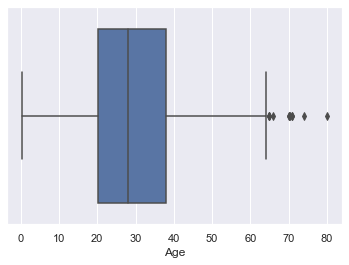

In [49]:
sns.boxplot(train2["Age"], orient = "vertical")

<AxesSubplot:xlabel='Fare'>

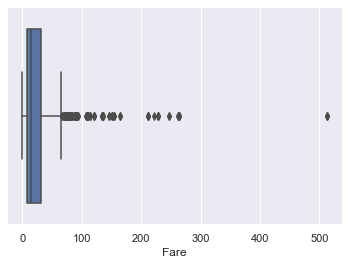

In [50]:
sns.boxplot(train2["Fare"], orient = "vertical")

In [51]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
def FillMissingValues(train):
    for column in train.columns:
        if train[column].isnull().sum() > 0:
            if train[column].dtype == 'object':
                train[column].fillna(train[column].mode()[0], inplace = True)
            elif train[column].dtype == 'str':
                train[column].fillna("Unknown", inplace = True)
            else:
                train[column].fillna(train[column].median(), inplace = True)
    return train
FillMissingValues(train2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
train2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Age'>

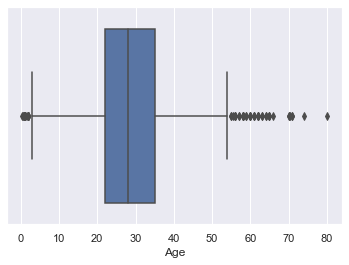

In [54]:
sns.boxplot(train2["Age"], orient = "vertical")

<AxesSubplot:xlabel='Fare'>

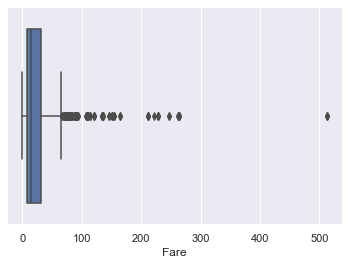

In [55]:
sns.boxplot(train2["Fare"], orient = "vertical")

<AxesSubplot:xlabel='SibSp'>

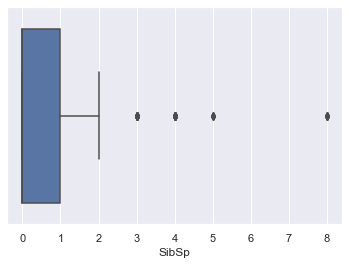

In [56]:
sns.boxplot(train2["SibSp"], orient = "vertical")

<AxesSubplot:xlabel='Parch'>

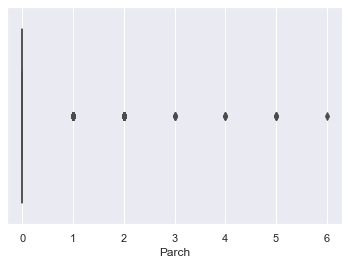

In [57]:
sns.boxplot(train2["Parch"], orient = "vertical")

In [58]:
q1 = train2["Age"].quantile(0.25)
q2 = train2["Age"].quantile(0.50)
q3 = train2["Age"].quantile(0.75)
iqr = q3 -q1
LF = q1 - (1.5*iqr)
UF = q3 + 1.5*(iqr)
print(q1," ",q2," ",q3," ",iqr," ",LF," ",UF)

22.0   28.0   35.0   13.0   2.5   54.5


In [59]:
for i in range(len(train2["Age"])):
    if train2["Age"].iloc[i] > UF:
        train2["Age"].iloc[i] = UF
    elif train2["Age"].iloc[i] < LF:
        train2["Age"].iloc[i] = LF
    else:
        train2["Age"].iloc[i] = train2["Age"].iloc[i]


<AxesSubplot:xlabel='Age'>

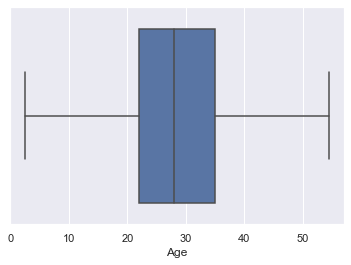

In [60]:
sns.boxplot(train2["Age"], orient = "vertical")

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Family Size,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Early Adult,1,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Early Adult,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Early Adult,0,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Early Adult,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Early Adult,0,B


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
train.replace({"Sex": {"male":0, "female":1}, "Embarked": {"S":0, "C":1, "Q":1}}, inplace = True)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category,Family Size,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,0,Early Adult,1,B
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Early Adult,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,Early Adult,0,B
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Early Adult,1,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,0,Early Adult,0,B


In [77]:
X = train.drop(columns = ["PassengerId", "Name","Ticket","Cabin","Age Category", "Family Size","Deck","Survived"], axis = 1)

In [78]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [79]:
Y = train.Survived

In [80]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [81]:
# Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [82]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape, Y_test.shape )

(891, 7) (712, 7) (179, 7) (712,) (179,)


# Model  Training

In [83]:
# Logistic Regression Model
model = LogisticRegression()


In [84]:
# training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [85]:
# Accuracy_Score on Training Data
X_train_prediction = model.predict(X_train)

In [86]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [88]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [89]:
training_data_accuracy

0.8103932584269663

In [90]:
X_test_prediction = model.predict(X_test)

In [91]:
X_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [92]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction )

In [93]:
test_data_accuracy

0.7821229050279329